## Invariant Mass

This work is focused to then be used to create a machine learning model to difference the signal of a particle to the background data. An important feature that can be calculated from a collisions data set or the information obtained by a collision simulation is the Invariant mass. 

All particles share an intrinsic property, their mass. For each particle generated by a collision it will correspond a mass that will be the same for all events that made it. Since all/most particles generated in a collision are unstable they will mostly decay into some other products (particles). But we can still measure the generated particle mass; due to the mass conservation principle the products masses (their sum) have to be the same as the generated particle mass they come from. 

For instance, for the case of the Higgs boson *H* what we measure in the detector is the decay of *H* into a final state of two particles A and B. By conservation of the energy and momentum:

$$E_H = E_A + E_B$$
$$\vec{p_H} = \vec{p_A} + \vec{p_B}$$
$$p_H = |\vec{p_H}|;$$ 
$$\ m_H = \sqrt{E_H^2 - p_H^2} \ \ \ \ (1)$$

This is the invariant mass and it is called this way because if we could have a perfect detecctor $m_H$ would remain the same even in the case that $E_H$ and $p_H$ differ from event to event.

As a note, this can be generalized to more than two particles in the final state and to any number of intermediate states.

Troughout this work we'll be using another useful formula to compute the invariant mass. We should note that the momentum is:

$$ \vec{p} = \begin{pmatrix}
       p_x\\
       p_y\\
       p_z
   \end{pmatrix}
   =
   \begin{pmatrix}
       p_T \times \cos \phi\\
       p_T \times \sin \phi\\
       p_T \times \sinh \eta
   \end{pmatrix} \ \ \ \ (2)
$$

With $p_T$ the transverse momentum, $\phi$ the azimuth angle and $\eta$ the pseudo rapidity. The modulus $p$ is

$$ p_T \times \cosh \eta $$

Where the mass of these particles is neglected, so $E = p$

The missing transverse energy $\vec{E^{miss}_T}$ is a two-dimensional vector:

$$ 
\vec{E^{miss}_T} = 
\begin{pmatrix}
|\vec{E^{miss}_T}| \times \cos \phi_T \\
|\vec{E^{miss}_T}| \times \sin \phi_T
\end{pmatrix}
$$

Where $\phi_T$ is the azimuth angle of the missing transverse energy.

We can calculate the invariant mass of two particles knowing that the invariant mass of the 4-momentum sum, which is (neglecting the mass of the two particles):

$$
    m_{inv}(\vec{a}, \vec{b}) = \sqrt{\left( \sqrt{a_x^2 + a_y^2 + a_z^2} + \sqrt{b_x^2 + b_y^2 + b_z^2} \right)^2 - (a_x+b_x)^2 - (a_y + b_y)^2 - (a_z^2 + b_z)^2} \ \ \ \ (3)
$$

### References:

Adam-Bourdarios, C., Cowan, G., Germain, C., Guyon, I., Kégl, B. &amp; Rousseau, D.. (2015). The Higgs boson machine learning challenge. <i>Proceedings of the NIPS 2014 Workshop on High-energy Physics and Machine Learning</i>, in <i>Proceedings of Machine Learning Research</i> 42:19-55 Available from https://proceedings.mlr.press/v42/cowa14.html

In [1]:
# We start by importing the libraries we'll use

# To read .root files
import uproot
# To work with the data and create a dataset
import numpy as np
import pandas as pd
import awkward as kw
# To graph the data distribution
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Import the data
file = uproot.open("/tf/Higgs-Boson-LHC-Collision-Detector/sigfcc_350.root")
print(file.keys())

['ProcessID0;1', 'ProcessID1;1', 'Delphes;1']


In [3]:
# In this work we are going to first create a dataset to save the information useful for our purposes, similar to
# the ones obtained in a .lhco file. 
# We're planning to calculate the invariant mass of all the leptons pairs we locate in our data  and then graph it
# to corroborate they came from a Z boson of mass 90 GeV

# We open the TTree with the information of the simulation to check which data will be of our interest.
tree = file["Delphes"]
tree.keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.ReadTime',
 'Event/Event.ProcTime',
 'Event/Event.ProcessID',
 'Event/Event.MPI',
 'Event/Event.Weight',
 'Event/Event.CrossSection',
 'Event/Event.CrossSectionError',
 'Event/Event.Scale',
 'Event/Event.AlphaQED',
 'Event/Event.AlphaQCD',
 'Event/Event.ID1',
 'Event/Event.ID2',
 'Event/Event.X1',
 'Event/Event.X2',
 'Event/Event.ScalePDF',
 'Event/Event.PDF1',
 'Event/Event.PDF2',
 'Event_size',
 'Weight',
 'Weight/Weight.fUniqueID',
 'Weight/Weight.fBits',
 'Weight/Weight.Weight',
 'Weight_size',
 'Particle',
 'Particle/Particle.fUniqueID',
 'Particle/Particle.fBits',
 'Particle/Particle.PID',
 'Particle/Particle.Status',
 'Particle/Particle.IsPU',
 'Particle/Particle.M1',
 'Particle/Particle.M2',
 'Particle/Particle.D1',
 'Particle/Particle.D2',
 'Particle/Particle.Charge',
 'Particle/Particle.Mass',
 'Particle/Particle.E',
 'Particle/Particle.Px',
 'Particle/Particle.Py',
 'Particle/Parti

In [4]:
# Since we want to create a dataset similar to the one obtained in a .lhco file we won't be working with
# all the data. We only be using the Eta & Phi angles and the transverse moment Pt. We also want to add a tag
# so we can identify what kind of particle is each one for each event. In this case we'll be working only with the 
# leptons and we'll calculate and check the distibution of their invariant mass.

# Z bosons often decay into a leptons pair. It could be z -> e^-, e^+ or z -> mu-, mu+.
# We first check and extract the necessary information from the muons detection:

tree["Muon"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon                 | int32_t                  | AsDtype('>i4')                
Muon.fUniqueID       | uint32_t[]               | AsJagged(AsDtype('>u4'))
Muon.fBits           | uint32_t[]               | AsJagged(AsDtype('>u4'))
Muon.PT              | float[]                  | AsJagged(AsDtype('>f4'))
Muon.Eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon.Phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon.T               | float[]                  | AsJagged(AsDtype('>f4'))
Muon.Charge          | int32_t[]                | AsJagged(AsDtype('>i4'))
Muon.Particle        | TRef[]                   | AsJagged(AsStridedObjects(M...
Muon.IsolationVar    | float[]                  | AsJagged(AsDtype('>f4'))
Muon.IsolationVar... | float[]                  | AsJagged(AsDtype('>f4'))
M

In [5]:
# We do the same for the electrons
tree["Electron"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron             | int32_t                  | AsDtype('>i4')                
Electron.fUniqueID   | uint32_t[]               | AsJagged(AsDtype('>u4'))
Electron.fBits       | uint32_t[]               | AsJagged(AsDtype('>u4'))
Electron.PT          | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Eta         | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Phi         | float[]                  | AsJagged(AsDtype('>f4'))
Electron.T           | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Charge      | int32_t[]                | AsJagged(AsDtype('>i4'))
Electron.EhadOverEem | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Particle    | TRef[]                   | AsJagged(AsStridedObjects(M...
Electron.Isolatio... | float[]                  | AsJagged(AsDtype('>f4'))
E

In [6]:
# Following the 2nd equation we'll need then, PT, Eta and Phi

pt_muon = tree["Muon/Muon.PT"].array(library = "ak")
eta_muon = tree["Muon/Muon.Eta"].array(library = "ak")
phi_muon = tree["Muon/Muon.Phi"].array(library = "ak")
charge_muon = tree["Muon/Muon.Charge"].array(library = "ak")

# We do the same for the electron

pt_electron = tree["Electron/Electron.PT"].array(library = "ak")
eta_electron = tree["Electron/Electron.Eta"].array(library = "ak")
phi_electron = tree["Electron/Electron.Phi"].array(library = "ak")
charge_electron = tree["Electron/Electron.Charge"].array(library = "ak")

In [7]:
# Now, observe what's inside the PT information of the muons:
pt_muon

<Array [[97.8, 20], [], [], ..., [...], [], []] type='500000 * var * float32'>

In [8]:
# A similar thing happens to the electron data. Since we only can get information from the events that come
# in lepton pairs we have to clean the not useful data.

events = len(pt_muon)

# This will be the cleaned data for the muon detections:
pt_m = []
eta_m = []
phi_m = []
charge_m = []

# And this will be the cleaned data for the electron detections:
pt_e = []
eta_e = []
phi_e = []
charge_e = []

for i in range(events):
    if len(pt_muon[i]) == 2:
        pt_m.append(pt_muon[i])
        eta_m.append(eta_muon[i])
        phi_m.append(phi_muon[i])
        charge_m.append(charge_muon[i])
    else:
        if len(pt_electron[i]) == 2:
            pt_e.append(pt_electron[i])
            eta_e.append(eta_electron[i])
            phi_e.append(phi_electron[i])
            charge_e.append(charge_electron[i])
            
pt_m = np.array(pt_m)
eta_m = np.array(eta_m)
phi_m = np.array(phi_m)
charge_m = np.array(charge_m)

pt_e = np.array(pt_e)
eta_e = np.array(eta_e)
phi_e = np.array(phi_e)
charge_e = np.array(charge_e)

In [9]:
# We check, for instance, what is cointained in one of this cleaned data
charge_m

array([[ 1, -1],
       [ 1, -1],
       [ 1, -1],
       ...,
       [ 1, -1],
       [-1,  1],
       [ 1, -1]], dtype=int32)

In [10]:
# To save all this we can create a DataFrame so we can visualice the data. And then we can create a .csv file so
# we don't have to run all the previous code again (which for the last cell was pretty slow):

muon_ = {
    "pt_m1": pt_m[:,0],
    "pt_m2": pt_m[:,1],
    "eta_m1": eta_m[:,0],
    "eta_m2": eta_m[:,1],
    "phi_m1": phi_m[:,0],
    "phi_m2": phi_m[:,1],
    "charge_m1": charge_m[:,0],
    "charge_m2": charge_m[:,1]
}

muon_data = pd.DataFrame(muon_)
path = "/tf/Higgs-Boson-LHC-Collision-Detector/muon_data.csv"
muon_data.to_csv(path, index = False)

electron_ = {
    "pt_e1": pt_e[:,0],
    "pt_e2": pt_e[:,1],
    "eta_e1": eta_e[:,0],
    "eta_e2": eta_e[:,1],
    "phi_e1": phi_e[:,0],
    "phi_e2": phi_e[:,1],
    "charge_e1": charge_e[:,0],
    "charge_e2": charge_e[:,1]
}

electron_data = pd.DataFrame(electron_)
path = "/tf/Higgs-Boson-LHC-Collision-Detector/electron_data.csv"
electron_data.to_csv(path, index = False)

In [11]:
df1 = pd.read_csv('/tf/Higgs-Boson-LHC-Collision-Detector/muon_data.csv')
df1.head()

,pt_m1,pt_m2,eta_m1,eta_m2,phi_m1,phi_m2,charge_m1,charge_m2
0,97.789630,19.964151,0.878810,-0.802487,2.420791,-2.895401,1,-1
1,95.542180,45.712536,-0.516883,0.572928,-0.010758,-0.509320,1,-1
2,48.594920,38.855106,1.577177,0.372206,2.543302,0.499532,1,-1
3,83.976875,42.813442,0.908262,0.123594,1.499397,0.145307,-1,1
4,71.092410,58.603443,-0.281558,0.978713,2.078060,1.781077,1,-1


In [12]:
df2 = pd.read_csv('/tf/Higgs-Boson-LHC-Collision-Detector/electron_data.csv')
df2.head()

,pt_e1,pt_e2,eta_e1,eta_e2,phi_e1,phi_e2,charge_e1,charge_e2
0,54.378260,50.591053,0.697100,1.150615,-0.352306,1.429148,1,-1
1,87.847980,25.325140,-0.939279,0.939353,0.551186,0.300517,-1,1
2,77.224910,48.918434,-0.145583,1.188260,2.972307,2.624266,-1,1
3,117.825530,44.724277,-0.090705,-0.235326,1.904418,-3.017226,-1,1
4,56.355495,47.292150,-1.097858,-0.036156,0.145205,1.390495,1,-1


In [13]:
# We can now compute the proper calculations in order to get then the Invariant Mass
# We'll start by calculating the momentum p, which following the eq. 2 and 3 is:

# For the muons

df1["m1_x"] = df1["pt_m1"]*np.cos(df1["phi_m1"])
df1["m1_y"] = df1["pt_m1"]*np.sin(df1["phi_m1"])
df1["m1_z"] = df1["pt_m1"]*np.sinh(df1["eta_m1"])

df1["m2_x"] = df1["pt_m2"]*np.cos(df1["phi_m2"])
df1["m2_y"] = df1["pt_m2"]*np.sin(df1["phi_m2"])
df1["m2_z"] = df1["pt_m2"]*np.sinh(df1["eta_m2"])

# For the electrons

df2["e1_x"] = df2["pt_e1"]*np.cos(df2["phi_e1"])
df2["e1_y"] = df2["pt_e1"]*np.sin(df2["phi_e1"])
df2["e1_z"] = df2["pt_e1"]*np.sinh(df2["eta_e1"])

df2["e2_x"] = df2["pt_e2"]*np.cos(df2["phi_e2"])
df2["e2_y"] = df2["pt_e2"]*np.sin(df2["phi_e2"])
df2["e2_z"] = df2["pt_e2"]*np.sinh(df2["eta_e2"])

# Then we can calculate the invariant mass

# For the muons:
df1["muon_m_inv"] = np.sqrt((np.sqrt(df1["m1_x"]**2 + df1["m1_y"]**2 + df1["m1_z"]**2) + 
                             np.sqrt(df1["m2_x"]**2 + df1["m2_y"]**2 + df1["m2_z"]**2))**2 - 
                            (df1["m1_x"] + df1["m2_x"])**2 - (df1["m1_y"] + df1["m2_y"])**2 -
                            (df1["m1_z"] + df1["m2_z"])**2 )

df2["electron_m_inv"] = np.sqrt((np.sqrt(df2["e1_x"]**2 + df2["e1_y"]**2 + df2["e1_z"]**2) + 
                             np.sqrt(df2["e2_x"]**2 + df2["e2_y"]**2 + df2["e2_z"]**2))**2 - 
                            (df2["e1_x"] + df2["e2_x"])**2 - (df2["e1_y"] + df2["e2_y"])**2 -
                            (df2["e1_z"] + df2["e2_z"])**2 )

In [14]:
# Now see what we got, first for the muons
df1.head()

,pt_m1,pt_m2,eta_m1,eta_m2,phi_m1,phi_m2,charge_m1,charge_m2,m1_x,m1_y,m1_z,m2_x,m2_y,m2_z,muon_m_inv
0,97.789630,19.964151,0.878810,-0.802487,2.420791,-2.895401,1,-1,-73.467089,64.539899,97.435401,-19.362181,-4.865517,-17.796731,92.925519
1,95.542180,45.712536,-0.516883,0.572928,-0.010758,-0.509320,1,-1,95.536651,-1.027829,-51.612646,39.910520,-22.288704,27.646485,82.369004
2,48.594920,38.855106,1.577177,0.372206,2.543302,0.499532,1,-1,-40.153976,27.370139,112.611685,34.107274,18.612177,14.798334,92.662221
3,83.976875,42.813442,0.908262,0.123594,1.499397,0.145307,-1,1,5.990808,83.762914,87.200980,42.362252,6.199228,5.304960,89.298288
4,71.092410,58.603443,-0.281558,0.978713,2.078060,1.781077,1,-1,-34.535772,62.140254,-20.282181,-12.232560,57.312547,66.961329,88.912945


In [15]:
# And for the electrons
df2.head()

,pt_e1,pt_e2,eta_e1,eta_e2,phi_e1,phi_e2,charge_e1,charge_e2,e1_x,e1_y,e1_z,e2_x,e2_y,e2_z,electron_m_inv
0,54.378260,50.591053,0.697100,1.150615,-0.352306,1.429148,1,-1,51.038324,-18.763919,41.052692,7.142208,50.084364,71.932747,85.018838
1,87.847980,25.325140,-0.939279,0.939353,0.551186,0.300517,-1,1,74.838054,46.005796,-95.193195,24.190156,7.496603,27.445435,102.905474
2,77.224910,48.918434,-0.145583,1.188260,2.972307,2.624266,-1,1,-76.121011,13.010703,-11.282394,-42.517193,24.193005,72.805704,90.728059
3,117.825530,44.724277,-0.090705,-0.235326,1.904418,-3.017226,-1,1,-38.583991,111.328932,-10.702066,-44.378846,-5.547881,-10.622216,91.980353
4,56.355495,47.292150,-1.097858,-0.036156,0.145205,1.390495,1,-1,55.762424,8.154381,-75.069806,8.480723,46.525528,-1.710291,83.204474


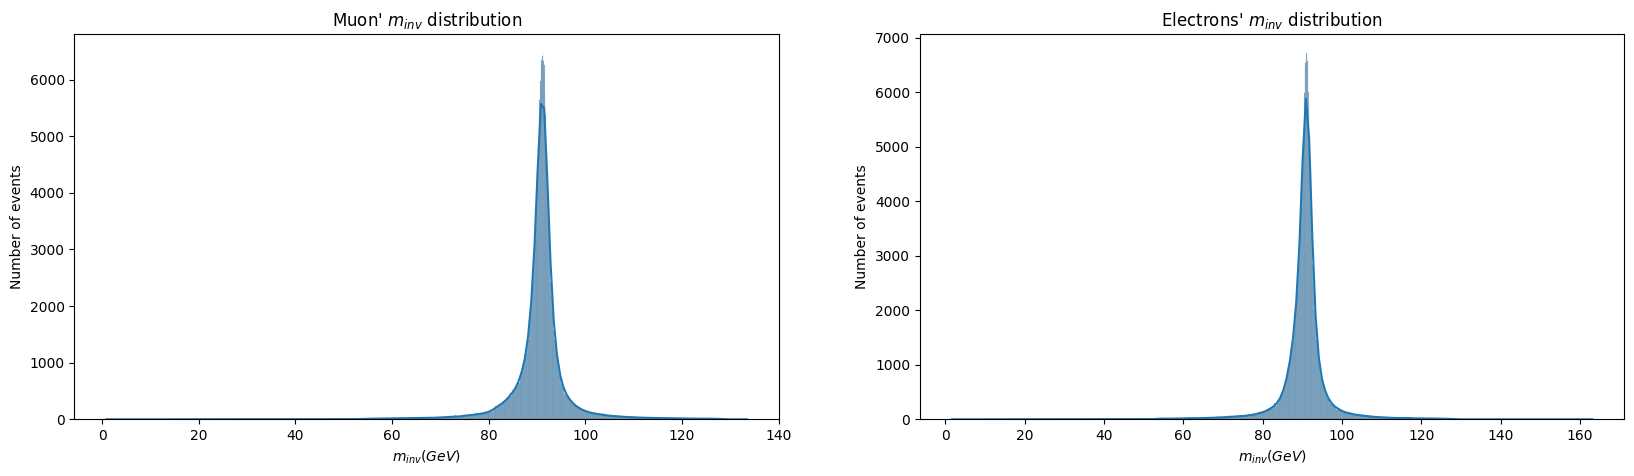

In [16]:
# We now graph the Invariant Mass distribution for each kind of lepton:
fig, axs = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(df1["muon_m_inv"], bins = 1000, kde = True, ax = axs[0])
axs[0].set_xlabel(r"$m_{inv} (GeV)$")
axs[0].set_ylabel("Number of events")
axs[0].set_title(r"Muon' $m_{inv}$ distribution")

sns.histplot(df2["electron_m_inv"], bins = 1000, kde = True, ax = axs[1])
axs[1].set_xlabel(r"$m_{inv} (GeV)$")
axs[1].set_ylabel("Number of events")
axs[1].set_title(r"Electrons' $m_{inv}$ distribution")

plt.show()

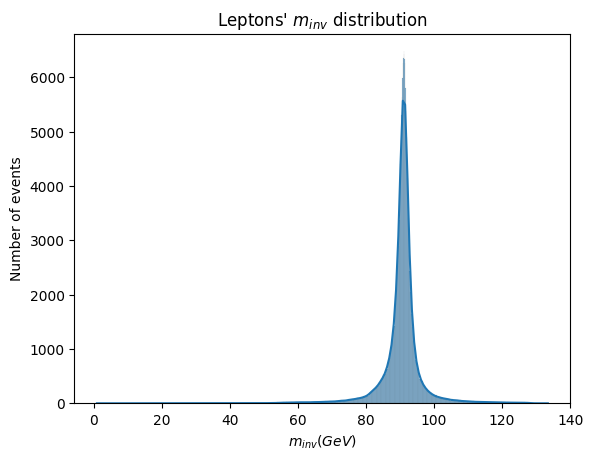

In [17]:
# And from all the data

m_inv_m  = pd.DataFrame({"m_inv": df1["muon_m_inv"].copy()})
m_inv_e  = pd.DataFrame({"m_inv": df2["electron_m_inv"].copy()})

m_inv = pd.merge(m_inv_m, m_inv_e, on = 'm_inv', how='left')

sns.histplot(m_inv["m_inv"], bins = 1000, kde = True)
plt.xlabel(r"$m_{inv} (GeV)$")
plt.ylabel("Number of events")
plt.title(r"Leptons' $m_{inv}$ distribution")
plt.show()